In [ ]:
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sb
from pathlib import Path
import matplotlib.pyplot as plot

In [ ]:
DIR = r"C:\Temp\ML_Fruad_Files"
DIR_PROTOCOL = r"C:\Temp\ML_Fruad_Files\Protocol"
DIR_Neighborhood = r"C:\Temp\ML_Fruad_Files\Neighborhood_Clusters"

In [ ]:
# Read data
df=pd.read_pickle(f'{DIR}\mrg_df_after_prep_stage1.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29210 entries, 0 to 29209
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 29210 non-null  category
 1   lat                    29210 non-null  float64 
 2   long                   29210 non-null  float64 
 3   acct_num               29210 non-null  category
 4   amt                    29210 non-null  float64 
 5   is_fraud               29210 non-null  bool    
 6   merch_lat              29210 non-null  float64 
 7   merch_long             29210 non-null  float64 
 8   street_type            29210 non-null  category
 9   cust_cluster           29210 non-null  category
 10  num_neighborhoods      29210 non-null  int64   
 11  distance_merch_cust    29210 non-null  float64 
 12  job_category           29210 non-null  category
 13  is_Risk Manager_Job    29210 non-null  bool    
 14  category_group         29210 non-null 

In [ ]:
#sb.heatmap(df.isnull(), yticklabels=False, cbar=False)

## Missing values

In [ ]:
df.isna().sum()
# There are no missing values

gender                   0
lat                      0
long                     0
acct_num                 0
amt                      0
is_fraud                 0
merch_lat                0
merch_long               0
street_type              0
cust_cluster             0
num_neighborhoods        0
distance_merch_cust      0
job_category             0
is_Risk Manager_Job      0
category_group           0
trans_month              0
trans_day_of_week_num    0
trans_hour               0
trans_hour_category      0
age_group                0
merchant_grouped         0
dtype: int64

## Outliers

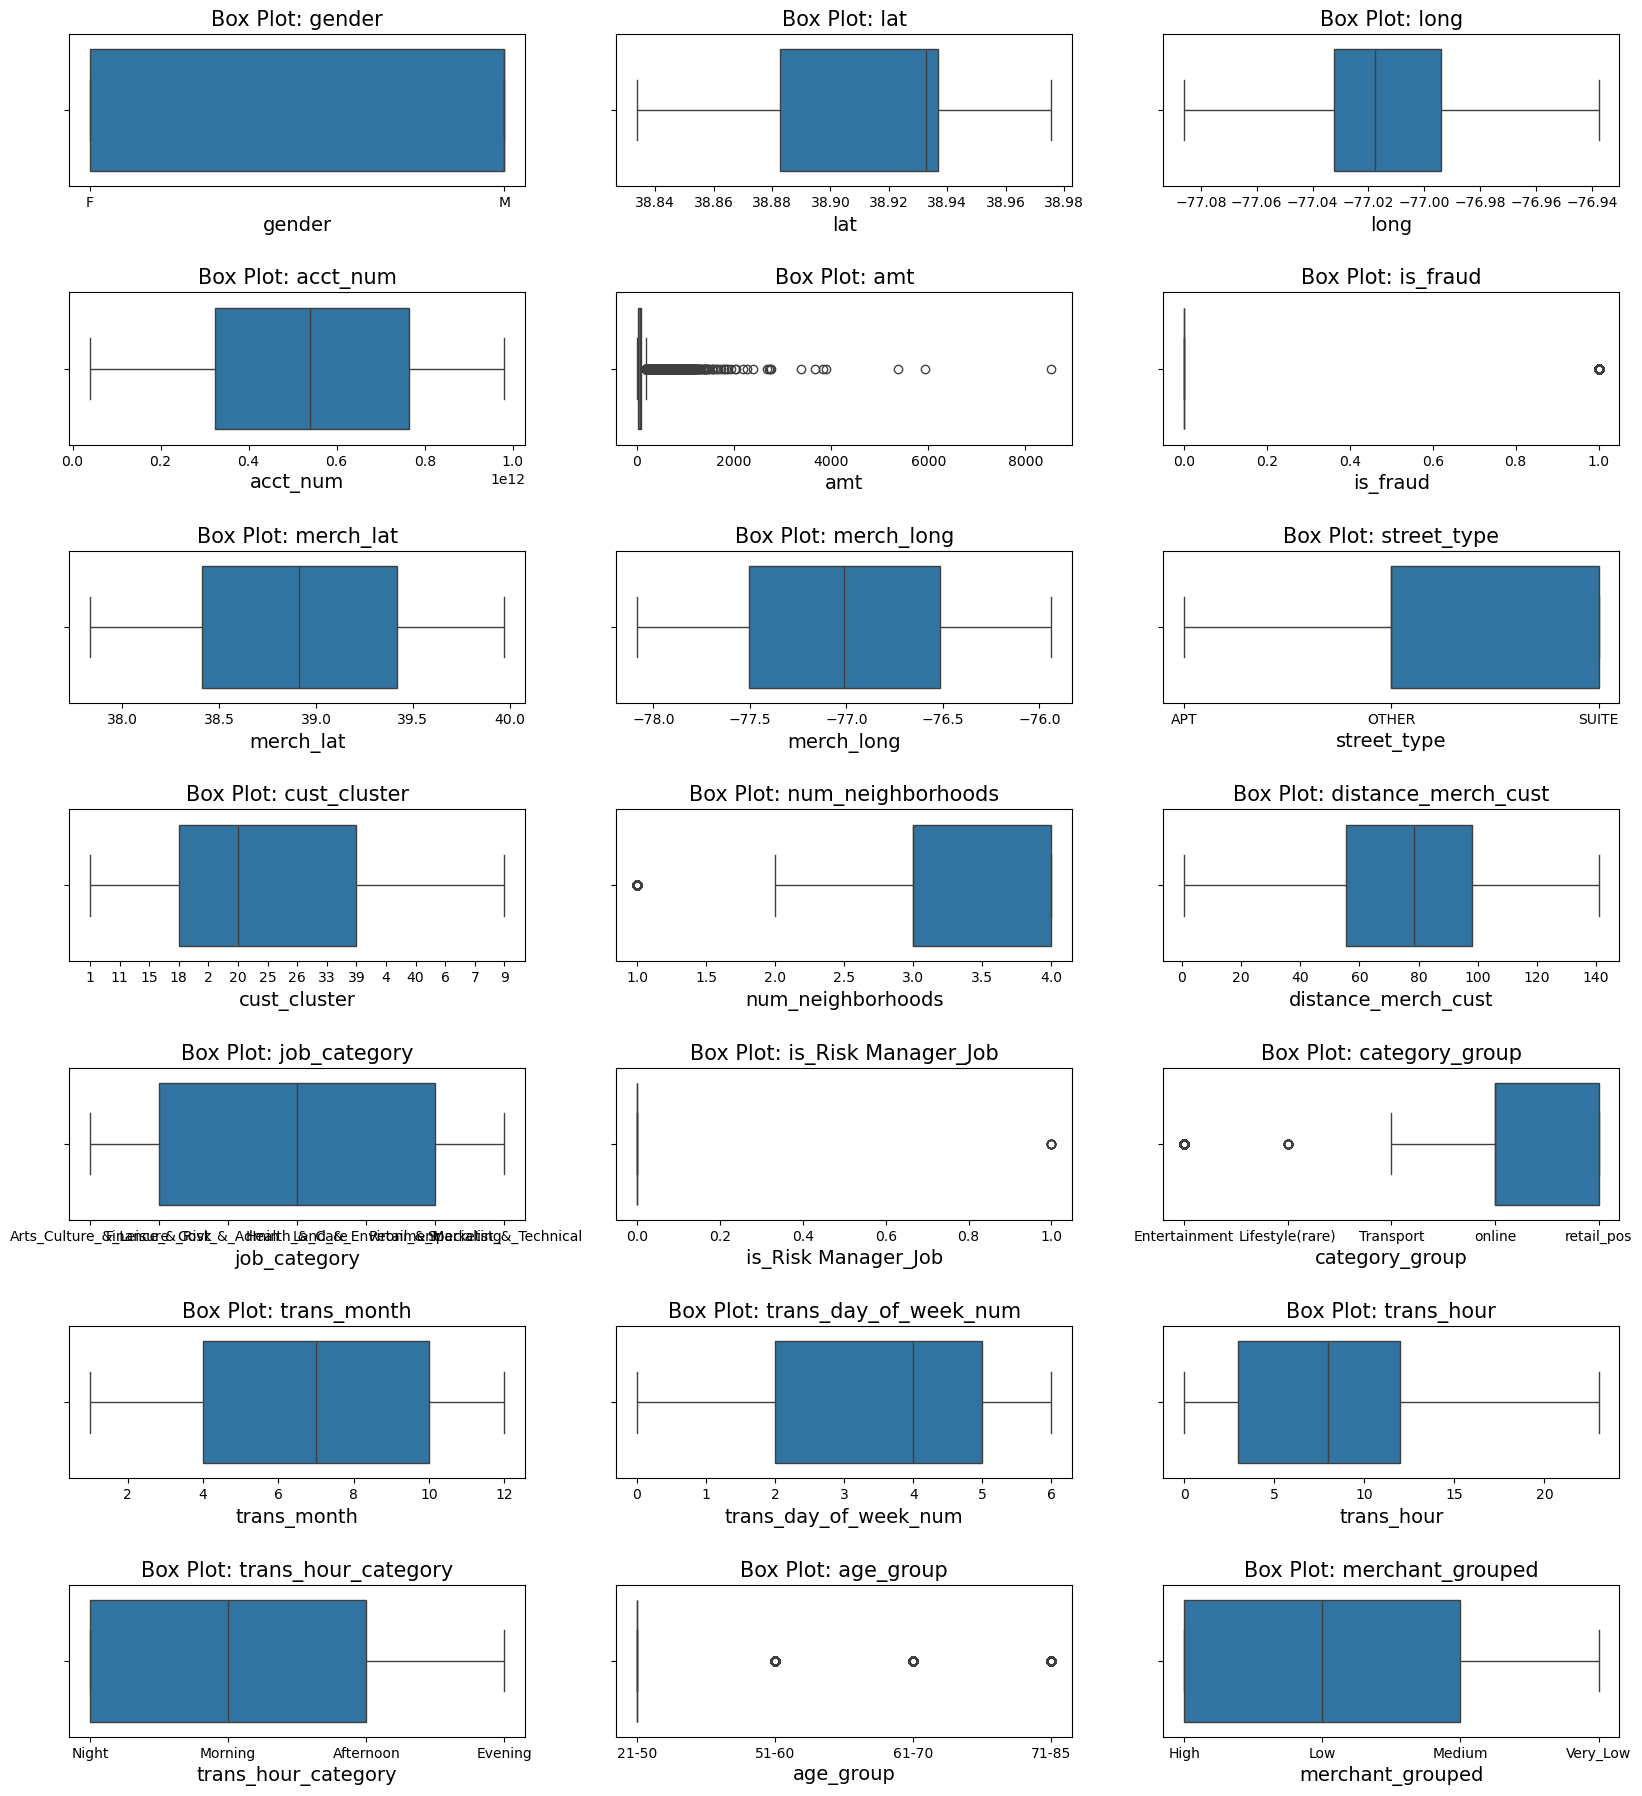

In [ ]:
## showing outliers by using box plot
plot.figure(figsize=(20,200))

def outliers_boxplot(df):
    for i, col in enumerate(df.columns):

            ax = plot.subplot(60, 3, i+1)
            sb.boxplot(data=df, x=col, ax=ax)
            plot.subplots_adjust(hspace = 0.7)
            plot.title('Box Plot: {}'.format(col), fontsize=15)
            plot.xlabel('{}'.format(col), fontsize=14)

#outliers_boxplot(df[numeric_cols])
outliers_boxplot(df)

**conclusions**

columns that has outliers according boxplot:

amt,
num_neighborhoods,
category_group,
age,
age_group

### IQR principle(Interquartile Range)

IQR=Q3−Q1 The range in which most of the data lies. Makes up 50% of all the data

This method does not assume that the data is normally distributed. Therefore, it is robust even when there is asymmetrical or skewed data.

IQR intended for Continuous variables



In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols

Index(['lat', 'long', 'amt', 'merch_lat', 'merch_long', 'num_neighborhoods',
       'distance_merch_cust', 'trans_hour'],
      dtype='object')

In [ ]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)#  25% of the data in the column is sorted - Q1
    Q3 = df[col].quantile(0.75)# 75% of the data in the column is sorted - Q3
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # accordind results of upeer, lower it can be seen outliers
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

lat: 0 outliers
long: 0 outliers
amt: 2008 outliers
merch_lat: 0 outliers
merch_long: 0 outliers
num_neighborhoods: 733 outliers
distance_merch_cust: 0 outliers
trans_hour: 0 outliers


num_neighborhoods, age has a lots of outliers

### Z-SCORE
A method designed for continuous columns with a normal distribution.

In [ ]:
# from skewneww check in EDA, i drop the amt column becuase its not normally distributed
numeric_cols = numeric_cols.drop('amt')
numeric_cols

Index(['lat', 'long', 'merch_lat', 'merch_long', 'num_neighborhoods',
       'distance_merch_cust', 'trans_hour'],
      dtype='object')

In [ ]:
from scipy import stats

# 2.5 Standart Diviatin from CT
threshold = 2.5

# calculate Z-Score for numerical columns
df_z = df[numeric_cols].apply(stats.zscore)

# finding outlier rows and marks them with new column is_outlier
df['is_outlier'] = (df_z.abs() > threshold).any(axis=1)

#ne column for save the outlier column name
df['columns_causing_outlier'] = (df_z.abs() > threshold).apply(
    lambda row: list(row.index[row]),
    axis=1
)

#print the outliers rows
#df[df['is_outlier'] == True]['columns_causing_outlier']
df[df['is_outlier'] == True]['columns_causing_outlier'].value_counts()
#outliers_z


columns_causing_outlier
[num_neighborhoods]                         732
[distance_merch_cust]                        38
[num_neighborhoods, distance_merch_cust]      1
Name: count, dtype: int64

In [ ]:
df.groupby('is_fraud')['is_outlier'].mean()
# conclusions:
# False    0.026289   → non fraud transaction has 2.6% Outliers
# True     0.040179   →fraud transaction has 4% Outliers

is_fraud
False    0.026289
True     0.040179
Name: is_outlier, dtype: float64

In [ ]:
# After finding the columns containing outliers, it can download the new columns I created.
df = df.drop(columns=['is_outlier', 'columns_causing_outlier'])

## save to file

In [ ]:
df.to_pickle(f'{DIR}\df_after_stage3.pkl')

In [ ]:
df.to_csv(f'{DIR}\Transactions_Customers_DC_2019_After_Stage3.csv', index=False)